<a href="https://colab.research.google.com/github/AshuMaths1729/COVID_jobs/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from fbprophet import Prophet

Forecasting without COVID-19 data

In [ ]:
odf = pd.read_excel('Unemployment_Rate_India_1991-2019.xlsx')
odf = odf.rename(columns = {"Year": "ds","Unemployment Rate":"y"})
odf['ds']=pd.to_datetime(odf['ds'], yearfirst=True)


In [ ]:
new_odf=odf.set_index('ds').resample('M').interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None).reset_index()

In [ ]:
new_odf

In [ ]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=337)
m.fit(new_odf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


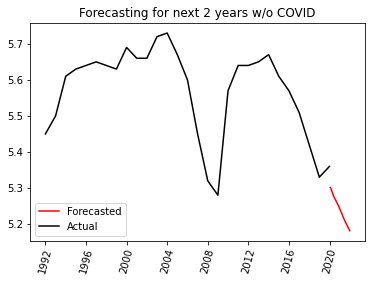

In [ ]:
## For nest two years
future2 = m.make_future_dataframe(periods=24, freq='M', 
                                include_history=False)
forecast2 = m.predict(future2)
#forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

plt.plot(forecast2['ds'], forecast2['yhat'], color='red')
plt.plot(odf['ds'], odf['y'], color='k')
plt.xticks(rotation=75)
plt.title("Forecasting for next 2 years w/o COVID")
plt.legend(['Forecasted','Actual' ])

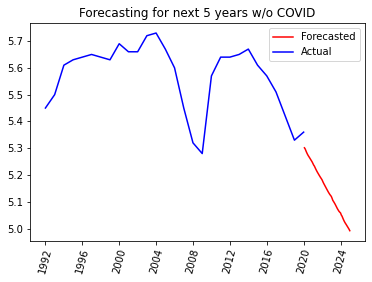

In [ ]:
## For next 5 years
future5 = m.make_future_dataframe(periods=60, freq='M', 
                              include_history=False)
forecast5 = m.predict(future5)
#forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

plt.plot(forecast5['ds'], forecast5['yhat'], color='red')
plt.plot(odf['ds'], odf['y'], color='blue')
plt.xticks(rotation=75)
plt.title("Forecasting for next 5 years w/o COVID")
plt.legend(['Forecasted','Actual' ])

Forcast With Effect of Covid-19

Forcast for Next 2 years

In [ ]:
df = pd.read_csv("Monthly_Unemployment_1991-2020.csv")
df['ds']=pd.to_datetime(df['ds'], yearfirst=True)

In [ ]:
len(df)

344

In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=17, freq='M', 
                                include_history=False)

In [ ]:
future

,ds
0,2020-08-31
1,2020-09-30
2,2020-10-31
3,2020-11-30
4,2020-12-31
5,2021-01-31
6,2021-02-28
7,2021-03-31
8,2021-04-30
9,2021-05-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-08-31,8.037952,6.209678,9.764484
1,2020-09-30,8.184735,6.508520,9.928268
2,2020-10-31,8.199108,6.409230,9.989350
3,2020-11-30,8.243343,6.643294,10.022042
4,2020-12-31,8.224258,6.536209,10.005478
5,2021-01-31,8.076123,6.280522,9.710982
6,2021-02-28,8.258266,6.515056,9.932895
7,2021-03-31,8.273174,6.593598,10.035316
8,2021-04-30,8.956652,7.260990,10.729951
9,2021-05-31,8.986524,7.416078,10.762146


In [ ]:
forecast[['ds', 'yhat']][4:].to_csv("Prophet_preds.csv")

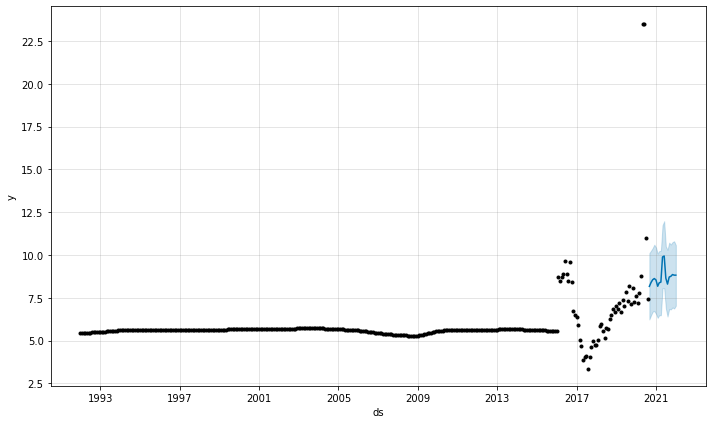

In [ ]:
fig1 = m.plot(forecast)

(array([737669., 737730., 737791., 737850., 737911., 737972., 738034.,
        738095., 738156.]), <a list of 9 Text major ticklabel objects>)

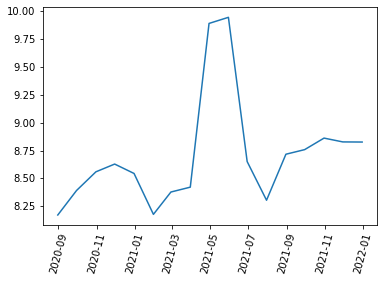

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.xticks(rotation=75)

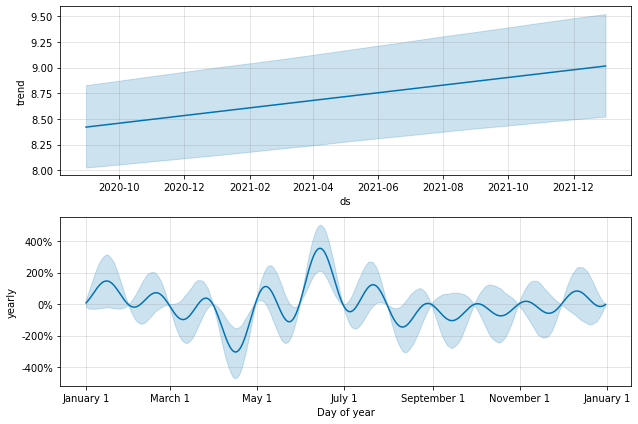

In [ ]:
fig2 = m.plot_components(forecast)

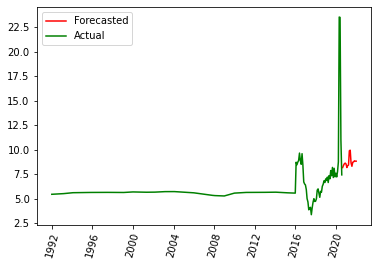

In [ ]:

plt.plot(forecast['ds'], forecast['yhat'], color='red')
plt.plot(df['ds'], df['y'], color='green')
plt.xticks(rotation=75)
plt.legend(['Forecasted','Actual' ])

Forcast for next 5 years

In [ ]:
future5 = m.make_future_dataframe(periods=65, freq='M', 
                                include_history=False)


In [ ]:
forecast = m.predict(future5)
forecast.to_csv()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
41,2024-01-31,10.027703,8.053138,12.151907
42,2024-02-29,9.308350,7.254495,11.296402
43,2024-03-31,9.330100,7.183305,11.256940
44,2024-04-30,12.095685,9.949519,14.420790
45,2024-05-31,12.227591,10.024921,14.421364
46,2024-06-30,9.500749,7.529873,11.578847
47,2024-07-31,9.085246,6.965002,11.111264
48,2024-08-31,9.917390,7.864086,12.033124
49,2024-09-30,10.220806,8.016414,12.324545
50,2024-10-31,10.358705,8.296521,12.567245


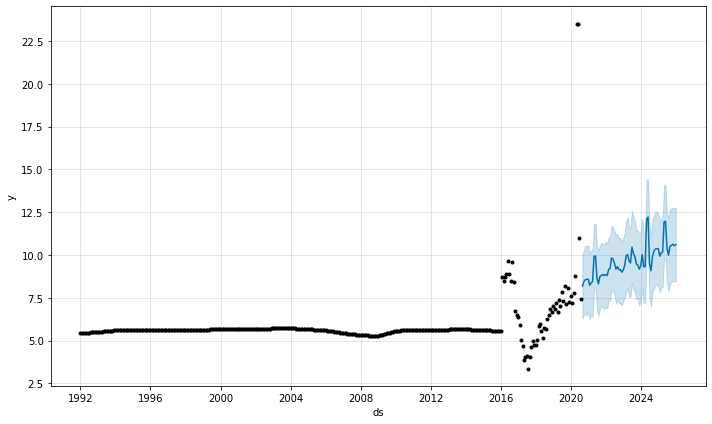

In [ ]:
fig1 = m.plot(forecast)

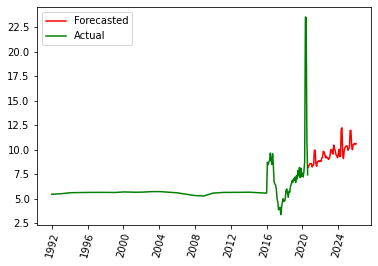

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'], color='red')
plt.plot(df['ds'], df['y'], color='green')
plt.xticks(rotation=75)
plt.legend(['Forecasted','Actual' ])

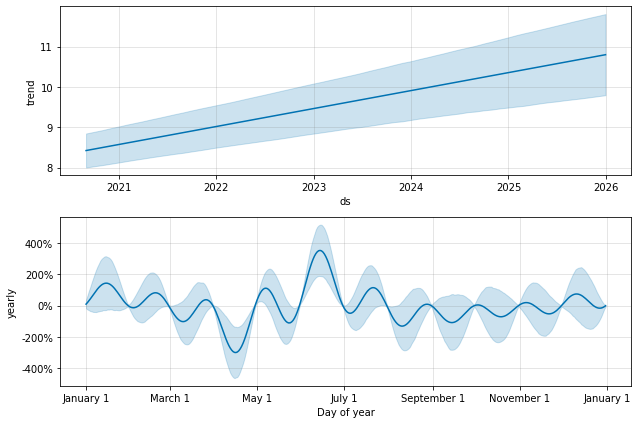

In [ ]:
fig2 = m.plot_components(forecast)